In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
vehicles = pd.read_csv("vehicles.csv")

c:\users\samarna\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (71,73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
vehicles.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
vehicles.shape

(39755, 83)

In [6]:
column_names = vehicles.columns.values

In [7]:
print(column_names)

['barrels08' 'barrelsA08' 'charge120' 'charge240' 'city08' 'city08U'
 'cityA08' 'cityA08U' 'cityCD' 'cityE' 'cityUF' 'co2' 'co2A'
 'co2TailpipeAGpm' 'co2TailpipeGpm' 'comb08' 'comb08U' 'combA08'
 'combA08U' 'combE' 'combinedCD' 'combinedUF' 'cylinders' 'displ' 'drive'
 'engId' 'eng_dscr' 'feScore' 'fuelCost08' 'fuelCostA08' 'fuelType'
 'fuelType1' 'ghgScore' 'ghgScoreA' 'highway08' 'highway08U' 'highwayA08'
 'highwayA08U' 'highwayCD' 'highwayE' 'highwayUF' 'hlv' 'hpv' 'id' 'lv2'
 'lv4' 'make' 'model' 'mpgData' 'phevBlended' 'pv2' 'pv4' 'range'
 'rangeCity' 'rangeCityA' 'rangeHwy' 'rangeHwyA' 'trany' 'UCity' 'UCityA'
 'UHighway' 'UHighwayA' 'VClass' 'year' 'youSaveSpend' 'guzzler'
 'trans_dscr' 'tCharger' 'sCharger' 'atvType' 'fuelType2' 'rangeA'
 'evMotor' 'mfrCode' 'c240Dscr' 'charge240b' 'c240bDscr' 'createdOn'
 'modifiedOn' 'startStop' 'phevCity' 'phevHwy' 'phevComb']


In [8]:
column_names[[22, 23, 70, 71, 72, 73]]

array(['cylinders', 'displ', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode'],
      dtype=object)

In [9]:
print("There are a total of {0} rows of data.".format(len(vehicles)))

There are a total of 39755 rows of data.


In [10]:
print("There are a total of {0} columns in the dataset.".format(len(vehicles.columns)))

There are a total of 83 columns in the dataset.


In [11]:
print("There are data available for {0} unique years between {1} and {2}.".format(len(pd.unique(vehicles.year)), 
                                                                                  min(vehicles["year"]),
                                                                                  max(vehicles["year"])))

There are data available for 36 unique years between 1984 and 2019.


In [12]:
print("The top fuel types in use are as follows:\n{0}".format(pd.value_counts(vehicles["fuelType"])))

The top fuel types in use are as follows:
Regular                        25852
Premium                        10931
Gasoline or E85                 1274
Diesel                          1123
Electricity                      165
Premium or E85                   125
Midgrade                          96
CNG                               60
Premium and Electricity           43
Regular Gas and Electricity       29
Premium Gas or Electricity        26
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         3
Name: fuelType, dtype: int64


In [13]:
print("The top transmission types in use are as follows:\n{0}".format(pd.value_counts(vehicles["trany"])))

The top transmission types in use are as follows:
Automatic 4-spd                     11045
Manual 5-spd                         8345
Automatic 3-spd                      3151
Automatic (S6)                       2942
Manual 6-spd                         2646
Automatic 5-spd                      2198
Automatic 6-spd                      1538
Manual 4-spd                         1483
Automatic (S8)                       1352
Automatic (S5)                        830
Automatic (variable gear ratios)      756
Automatic 7-spd                       708
Automatic (AM-S7)                     345
Automatic 8-spd                       337
Automatic (S7)                        303
Automatic (S4)                        233
Automatic (AM7)                       211
Automatic 9-spd                       195
Automatic (AV-S6)                     186
Automatic (A1)                        160
Automatic (AM6)                       136
Automatic (AM-S6)                     113
Automatic (AV-S7)         

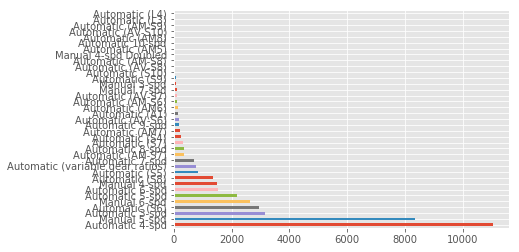

In [14]:
(pd.value_counts(vehicles["trany"].sort_values(ascending = False))).plot(kind = "barh")

In [15]:
print("There are two broad types of transmissions, Automatic(A) and Manual(M): \n{0}".format(pd.value_counts(vehicles["trany"].str[0])))

There are two broad types of transmissions, Automatic(A) and Manual(M): 
A    27079
M    12665
Name: trany, dtype: int64


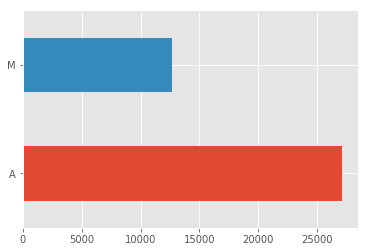

In [16]:
(pd.value_counts(vehicles["trany"].str[0])).plot(kind = "barh")

In [19]:
grouped_by_year = vehicles.groupby("year")


       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19   0.0000        0   
1      29.964545         0.0        0.0        0.0       9   0.0000        0   
2      12.207778         0.0        0.0        0.0      23   0.0000        0   
3      29.964545         0.0        0.0        0.0      10   0.0000        0   
4      17.347895         0.0        0.0        0.0      17   0.0000        0   
5      14.982273         0.0        0.0        0.0      21   0.0000        0   
6      13.184400         0.0        0.0        0.0      22   0.0000        0   
7      13.733750         0.0        0.0        0.0      23   0.0000        0   
8      12.677308         0.0        0.0        0.0      23   0.0000        0   
14     25.354615         0.0        0.0        0.0      12   0.0000        0   
688    18.311667         0.0        0.0        0.0      16   0.0000        0   
689    17.347895         0.0        0.0 

In [21]:
averaged = grouped_by_year["comb08", "highway08", "city08"].agg([np.mean])

In [22]:
averaged.columns = ["comb08_mean", "highway08_mean", "city08_mean"]

In [24]:
averaged.head()

,comb08_mean,highway08_mean,city08_mean
year,,,
1984,19.881874,23.075356,17.982688
1985,19.808348,23.042328,17.878307
1986,19.550413,22.699174,17.665289
1987,19.228549,22.445068,17.310345
1988,19.328319,22.702655,17.333628


In [25]:
averaged["year"] = averaged.index

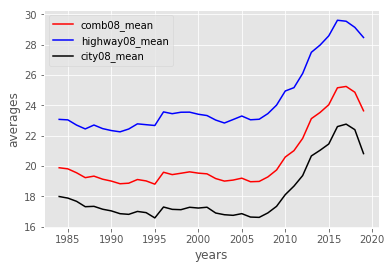

In [36]:
plt.figure()

x = averaged["year"]
averaged["comb08_mean"]

plt.plot(x, averaged["comb08_mean"], "r-", label = "comb08_mean")
plt.plot(x, averaged["highway08_mean"], "b-", label = "highway08_mean")
plt.plot(x, averaged["city08_mean"], "k-", label = "city08_mean")
plt.xlabel("years")
plt.ylabel("averages")
plt.legend()
plt.show()